<a href="https://colab.research.google.com/github/Vcetpreeti/DS_internship/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
credit_card_data=pd.read_csv("creditcard.csv")
redit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3980,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
3981,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
3982,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
3983,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
3984,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,3985.000000,...,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3984.000000,3983.000000,3983.000000,3983.000000,3983.000000
mean,4882.712422,-0.342336,0.295676,0.956401,0.350787,-0.090254,0.047461,-0.011432,-0.111929,0.722008,...,-0.048892,-0.161233,-0.037283,0.015358,0.155481,0.125154,0.008020,-0.007900,67.488566,0.006026
std,4227.077341,1.575572,1.325769,1.134939,1.354066,1.191891,1.232063,1.112935,1.210856,1.239756,...,0.928970,0.636110,0.574724,0.573310,3.692894,0.514528,0.441222,0.289845,222.649726,0.077400
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-10.470770,-22.605711,-3.878658,...,-11.084324,-8.527145,-15.144340,-2.162523,-2.577363,-1.243924,-6.573218,-3.054085,0.000000,0.000000
25%,752.000000,-1.109297,-0.186752,0.421362,-0.467058,-0.630525,-0.647489,-0.464705,-0.202836,-0.119880,...,-0.269294,-0.537756,-0.173483,-0.328084,-0.170315,-0.279042,-0.081645,-0.022066,5.000000,0.000000
50%,6670.000000,-0.420050,0.307970,0.996323,0.285025,-0.157522,-0.182829,0.011509,0.002359,0.671395,...,-0.135355,-0.148984,-0.051309,0.081781,0.135816,0.062070,0.002918,0.019023,15.950000,0.000000
75%,9086.000000,1.122018,0.947750,1.662427,1.139576,0.330242,0.390611,0.489440,0.241252,1.465153,...,0.040743,0.213673,0.071019,0.404226,0.384123,0.413090,0.131076,0.083870,54.990000,0.000000
max,10981.000000,1.685314,8.261750,4.017561,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,1.215279,231.480000,3.517346,4.173387,4.157934,7712.430000,1.000000


In [7]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3985 entries, 0 to 3984
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    3985 non-null   int64  
 1   V1      3985 non-null   float64
 2   V2      3985 non-null   float64
 3   V3      3985 non-null   float64
 4   V4      3985 non-null   float64
 5   V5      3985 non-null   float64
 6   V6      3985 non-null   float64
 7   V7      3985 non-null   float64
 8   V8      3985 non-null   float64
 9   V9      3985 non-null   float64
 10  V10     3985 non-null   float64
 11  V11     3985 non-null   float64
 12  V12     3985 non-null   float64
 13  V13     3985 non-null   object 
 14  V14     3985 non-null   float64
 15  V15     3984 non-null   float64
 16  V16     3984 non-null   float64
 17  V17     3984 non-null   float64
 18  V18     3984 non-null   float64
 19  V19     3984 non-null   float64
 20  V20     3984 non-null   float64
 21  V21     3984 non-null   float64
 22  

In [8]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       2
V28       2
Amount    2
Class     2
dtype: int64

In [9]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0.0    3959
1.0      24
Name: count, dtype: int64

In [23]:
#dealing with missing values

credit_card_data['V15'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V16'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V17'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V18'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V20'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V21'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V22'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V23'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V24'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V25'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V26'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V27'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V28'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['V19'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['Amount'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data['Class'].fillna((credit_card_data['V16'].mean()), inplace=True)
credit_card_data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [29]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]


In [27]:
print(legit.shape)
print(fraud.shape)

(3959, 31)
(24, 31)


In [50]:
credit_card_data['Class'].value_counts()

Class
-0.060388    2
Name: count, dtype: int64

In [51]:
 #statistical measures of the data
legit.Amount.describe()

count    3959.000000
mean       67.286987
std       221.425556
min         0.000000
25%         5.000000
50%        15.980000
75%        55.000000
max      7712.430000
Name: Amount, dtype: float64

In [52]:
 #statistical measures of the data
fraud.Amount.describe()


count      24.000000
mean      100.740833
std       379.628808
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [54]:
# Convert relevant columns to numeric, handling errors
for col in credit_card_data.columns:
    if col not in ['Time', 'Class']:  # Exclude non-numeric columns
        try:
            credit_card_data[col] = pd.to_numeric(credit_card_data[col], errors='coerce')
        except:
            print(f"Could not convert column {col} to numeric")

# Calculate the mean
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
-0.060388,6253.5,0.145519,0.661799,1.123376,1.591309,-0.502861,-0.473528,-0.087816,0.157765,-0.119166,...,0.280854,-0.526934,0.48833,0.005297,0.059738,115.709806,-0.030194,-0.060388,-0.060388,-0.060388


In [56]:


legit_sample = legit.sample(n=492)


In [57]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [58]:


new_dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1622,1259,1.258758,0.430999,0.328302,0.682920,-0.280232,-1.049508,0.154577,-0.261395,-0.121385,...,-0.276444,-0.746132,0.117960,0.373165,0.250807,0.091091,-0.016256,0.032853,0.89,0.0
2091,6915,-0.635633,1.521837,0.656768,0.838245,0.532915,0.157448,0.292106,0.380324,0.532503,...,-0.019119,0.305075,-0.183507,-0.795949,-0.133169,-0.274159,0.286487,0.142654,5.00,0.0
3206,9434,-1.530356,1.290516,0.738410,-0.457842,-0.107840,1.105888,-0.700017,1.355437,1.712226,...,-0.221934,-0.251064,-0.242827,-1.388564,0.176284,0.445314,0.155731,0.075487,0.01,0.0
3166,9374,0.453226,-0.231321,1.257990,3.951936,-0.004385,1.978375,-0.431188,0.597853,0.391562,...,0.036984,-0.192773,0.108225,-0.769924,-0.339273,-0.103663,0.008415,0.059550,237.86,0.0
228,153,-0.648576,0.740565,1.800381,0.140826,0.050646,-0.257415,0.920470,-0.422028,0.590522,...,-0.229107,-0.161205,-0.112530,0.420750,-0.139914,0.163193,-0.469014,-0.350543,22.99,0.0


In [61]:
new_dataset.groupby('Class').mean()

TypeError: Could not convert 1.242613946275982.506756052890360.3546413704760040.37603134908226-0.774136093006546-1.395082585731891.604902707774781.25107120254823-0.575758309114473-1.289269177236490.7582408542995910.415924789149510.6462500195689571.109328385605261.37647631872707-0.643433497627554-0.551816447915434-0.06450428143031950.4876836353796780.9594465255919791.70830929412286-1.642896739300560.2111729391787052.963381362488410.66474967416360.5339824725349920.1667530016808220.2425197675569082.150845012864080.3782133432884692.856881654092952.02151706003188-1.948199846919892.010321050100132.240978899986220.007594930928953260.539217436315413-1.03002110597715-1.460445894503890.103507945271411.718146174784261.26293974106323-0.15026263098715-0.71184637103064-0.1794462050357880.5222917503960960.5368162185833751.711630305906641.935399453437790.626672159305198-0.222535111083363-0.06419690168191162.763625187286180.7256374475819611.819315803932220.9826921027259213.035156588342362.05340416419857-0.345828287134555-2.3316282304557-1.67868141210165-1.079581514252470.00432058041089314-0.912194068804876-0.299508893568877-0.4763903079109381.12438787041011.40824036194911-0.670058111069994-0.9790959939574022.138217649890461.492046385379421.414686891539171.494849482099253.245401260530712.25563319031865-0.01441469159168971.06506277027779-1.42323378745826-0.342590386622034-0.29939568683137-1.00806878108340.5030423569699670.8435161104778062.714119377531951.166293096665962.427123343887410.717292731410831-0.7015664155003522.937536956608451.149812452448272.318108275199921.5167552030222.5451111070572.061649149435051.700117677939990.4482342616718640.2805356219940521.147057866808010.4450388911758191.16858064156342-0.4241926056519660.1937324532877320.713683345217524-0.5764668343443641.09980619218914-0.4539062171657951.381851479860351.269825533209940.25165478608167-0.0572531284391491.06197557402973-1.240184765905772.260793725665851.84712029251533-0.531035686507206-0.64888972505504-0.165320972492692.340966771819620.882036282038514-0.196390815238159-0.1350480165031721.777097069217360.9444880694820131.849677110065341.294916151451471.489383784213581.133557329464423.008914309687233.028398613644541.977202900494671.693538888432810.606303258957496-0.3387748942365012.03842170423462-0.9629912981305180.675280869649582.94338416150071.255263810936721.78249076453970.08598803897873141.37176815420098-0.824467339464690.451286167528241.369498464764331.281090397225891.45673985375059-0.245263247291252.427758350142181.651210425476190.6230645876141931.35698211416139-0.0723848242526193-1.077076495695950.9545591017932091.519192738663051.638098292127831.944321646572711.655848774272523.35787394619151-0.05237857952891340.142994788502416-1.581212538535562.361077806863221.159453161624572.3896070633792.60099489189665-0.2467479518764430.00274659269699482.529979232229691.01866834582390.4609273251672681.2529470542960.730099848225361-0.2899565234459582.161376623580230.644621226287679-0.8902010606157160.06309158302047180.1555181833269081.456318051398411.32775240607008-1.41958691269748-1.551035041871570.2891563884732220.393315676518019-0.5141005689527930.7672624845537410.4050515106659020.3490449689741942.93607566873618-2.398921977977490.1612550879328091.244843179579552.931889173360981.479796641548391.884854420746621.05509366630221-0.09342697278872230.5700093535012061.5091189783238-1.696914001351281.258257779333960.9995822517366240.148526687774732-0.794322268873517-0.404278922670434-0.606912210005188-0.8098259522391991.857474640318511.013726294346761.22452052211577-0.2022583313082790.144465599622731.584515370988812.333701866699141.08776025114597-1.20114945320650.620989717054661-0.571821891415037-0.8026149308039760.2830468987957142.81502771950369-1.523079733961550.0961362389085825-0.60434340909999-0.186637651454442-2.563325990580132.527262433624360.4398770903940520.0812221878395934-0.7394574670295132.54526121183737-0.455794649314691-0.2862536324705831.740871127757251.936190818318391.681233144167461.2717742113903-0.2791732843275830.508310874067417-0.7574565468956960.6062498594527640.626633862142891-0.512264825794821-0.8502145203560131.768774207943940.05155201061367842.51477604071982-0.118735702614523-0.4268130336539421.43172628767142.780708463862540.9109908950808310.7459981286485520.3490978868914092.05546673417398-0.8230626754555941.545356247396010.361485409760927-0.7946769561580791.200857081749170.7783054208960132.37009828060539-2.20088352326707-1.240277545285532.56703520396756-0.460452528942284-0.4881930487775361.939794582658460.4411822856675150.550365661584527-0.5102274210641351.547688821224932.53562862426938-0.2551266084841582.26566523368402-0.3112328334950981.396884199099930.831598367444403-0.6220970094257920.3503629689314211.414230888437351.6563332557041-0.2282732448943961.195759822661472.367715455483330.111245310474640.2759719982112611.67206452794382-0.6929153306149481.634770941570010.1846063597166832.74788534864836-0.679088049454212-1.494562627381931.09063400851111.275057724716560.7711515060620432.88971857556912-0.876498835758804-0.2434226594794-1.553127110478370.953367980009220.280865213652108-1.124936112686051.177662134958370.07300031400035140.1739596319652572.12765078737568-1.33995081169692-0.22665608784449-0.309663884916577-0.4107126648571573.122028787228061.067773029818320.7207426163441290.2695003020684190.449403331844814-0.8131034220170670.7206561194192861.623446644259951.64109565423332-0.501527830459660.6164960353604881.82899692656261-1.060235461337870.4376180526441560.07384456716862010.7214993435487761.61216031677144-0.5897079154984232.06413634454840.31408732844468-1.283471334666782.56312985156623-0.3250945715432061.982382834908220.799319242885751.406784703939581.664196223163761.38072048009905-1.256412534542280.7546936165556780.827712639997383-0.230384306760232.142046358661980.847507646079169-0.525646613995621.583967755279721.190012091802720.7159253111507850.3731792214991171.921850765755110.9238468158351130.184083381573905-0.83741929536407-0.2232743761111460.857870888320398-0.729473777220335-0.633655364175992-1.397223298377820.8202650584129292.503877129192120.4183473939690771.16301941473812-0.6679024589780851.054662154295240.02197186210626032.218395953320480.494713539279126-2.494030595053480.557143374654641-0.991389847235408-0.341717160054779-1.073807593043842.296088666030971.15127514495780.635789217113918-1.21517622258607-0.5337661178617560.2115425470443241.66235662337336-1.24797548075721-0.8890868142617320.4275241887524440.664774471741395-0.04554144756740722.96973990518134-0.28986031374681.892008736884690.3627407432984020.8607245219555371.887729778613683.488989808805981.37366449531260.946458603336211-0.3306520141847250.2941166614080660.1476545229105151.0275222166309-0.1468238615839821.356236936135911.312629521196740.06304386331763772.21386963912298-1.511909098580780.8966507656407372.32648638929151-1.194290991132070.371111672178442-0.1761297959273431.310909038233832.13905498871137-0.9914952919389742.121783498624941.62017923731132.34536051896089-1.342495781008370.08523834016469872.349728543330330.965929752065513-0.453947626273043-0.789236066478397-0.584236303625681.380826322184952.374698045612242.02106393274492-1.655411263406061.801805634663451.45301002762240.003115070446263852.2701316055453-0.2220481407128831.067092687727450.9425123475535660.792222010029020.08744947287920930.09550234651572661.877143773563760.0682386198321481.218822087998460.835233964202459-0.3759075298993840.991389954636424-0.1439450526658911.635455341627121.16380192141018-0.1134567942600422.09138624669268-0.358090652573631-0.6577163376698042.895110304482420.576519410542140.3948550584117540.7010786466325780.8741013347526471.72570671645275-0.751062715562620.005107829411449312.403443937404320.5951622042295081.880959103219552.764061585684662.167940457964532.11430454171326-0.841388199403929-1.860225916392580.7092788925207040.177717765477262-0.0434648056700517-1.77962640652290.453491082019146-0.232785682881897-0.4396180327597040.348642811115436-0.0929870346182179-0.2187550942903880.143605786968986-0.3545529865869143.07860650512566-1.450850411848870.6716774346119770.786041698504024-0.2091826255903272.181125702143550.4936917942255011.792524997875541.396218879409821.611834305654940.524599605600812-0.508285561629094 to numeric

In [62]:

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [59]:
new_dataset['Class'].value_counts()

Class
0.0    492
1.0     24
Name: count, dtype: int64

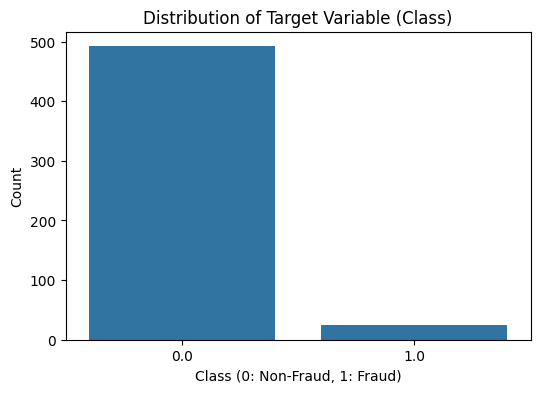

In [66]:
# Plot distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=new_dataset)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

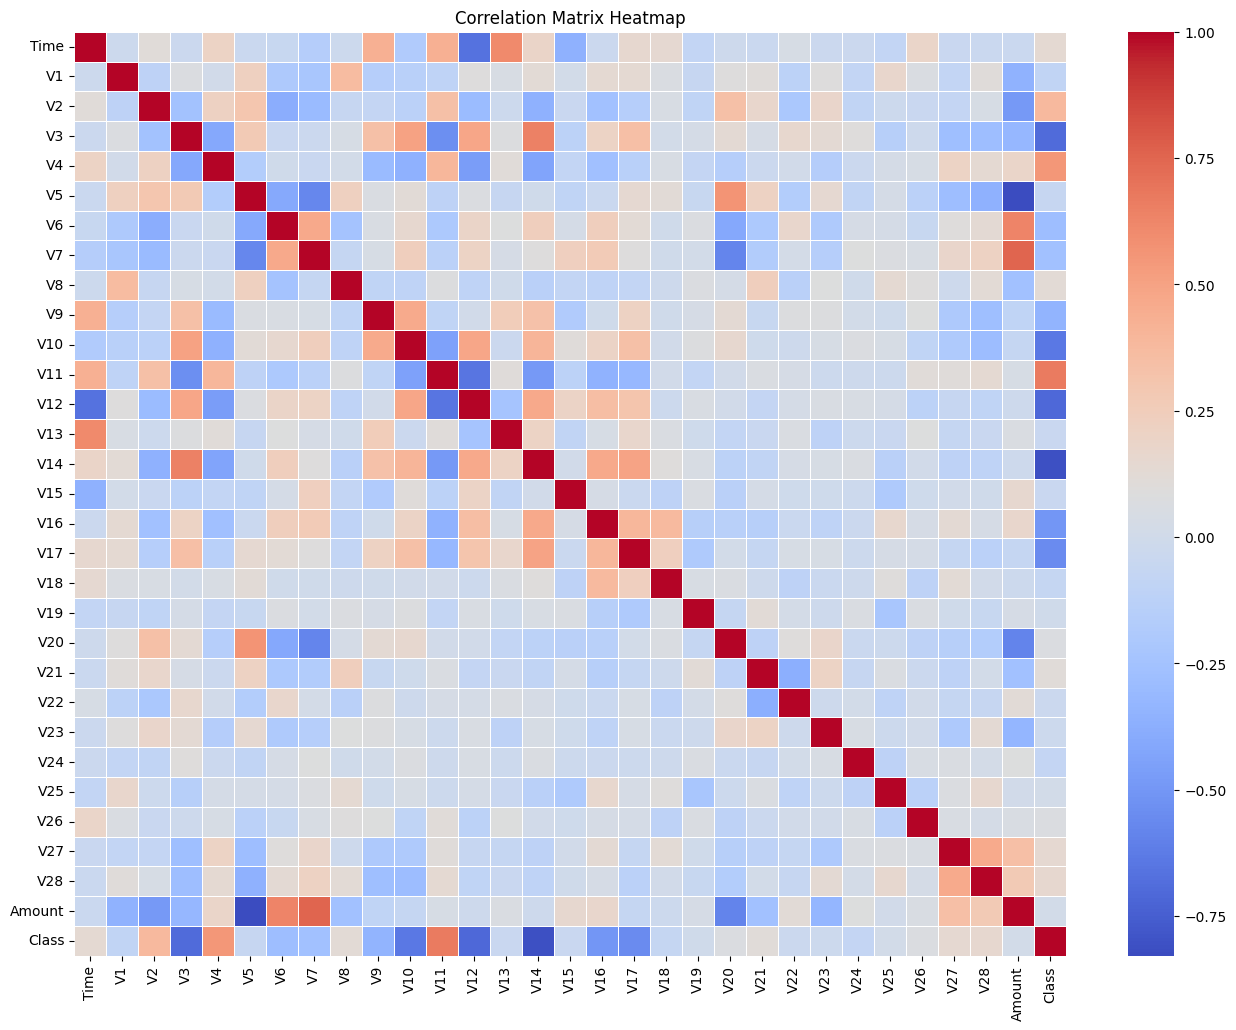

In [68]:
plt.figure(figsize=(16, 12))
correlation_matrix =new_dataset.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


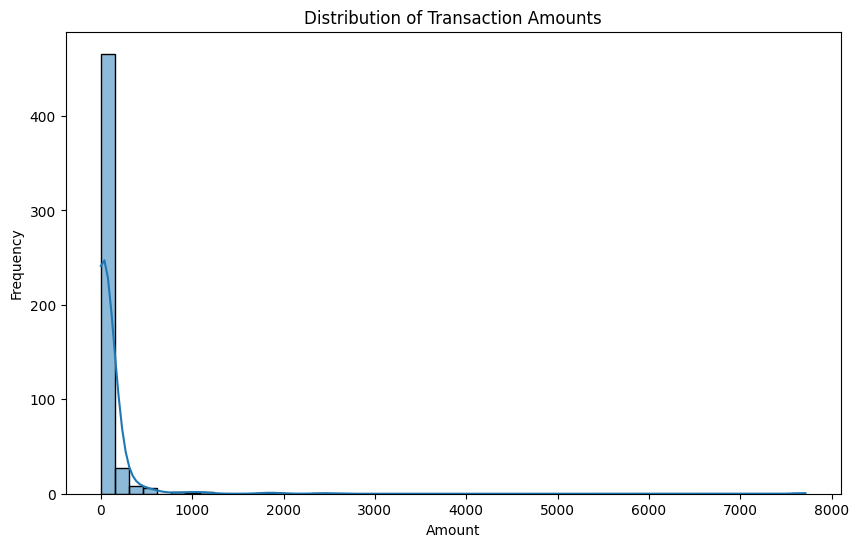

In [69]:
# Plot distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(new_dataset['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

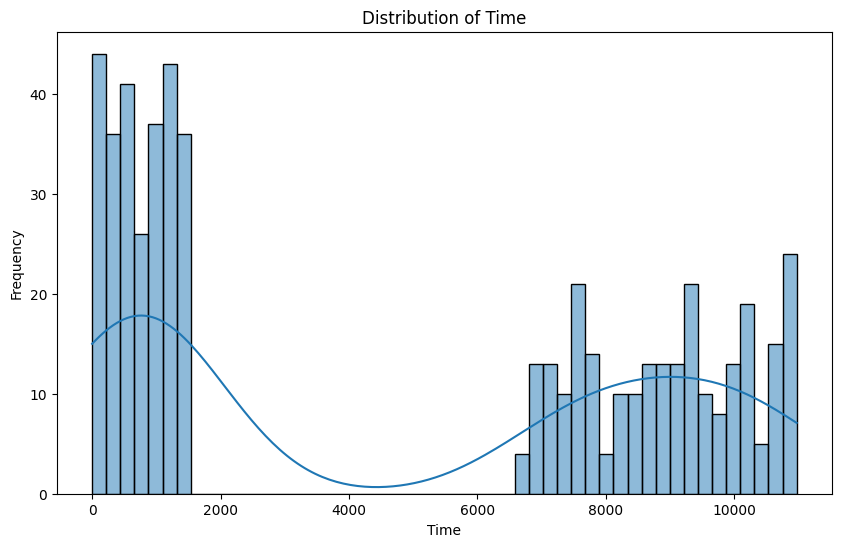

In [70]:
# Plot distribution of time
plt.figure(figsize=(10, 6))
sns.histplot(new_dataset['Time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


In [72]:

print(X.shape, X_train.shape, X_test.shape)

(516, 30) (412, 30) (104, 30)


In [73]:
model = LogisticRegression()


# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [74]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)


print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [75]:

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [76]:

print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9903846153846154
